# Project Brief: identifying customer geographies

As an analyst for ProWidget Systems, a United Kingdom-based B2B (business-to-business) retailer, you’ve been asked to report on spending volumes for London-based customers versus those based in the rest of the United Kingdom. The board have supplied a high-level data extract containing all customers’ addresses and their total spend to date. They want to know:

1- Which UK cities are currently underserved?

2- Are their customers primarily London-based?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
FilePath = "addresses.csv"

In [4]:
dataframe = pd.read_csv(FilePath)

In [5]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   company_id   100000 non-null  int64 
 1   address      99032 non-null   object
 2   total_spend  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None


# Insights:

    **Total Rows: The DataFrame contains 100,000 rows (entries), with indexes ranging from 0 to 99,999.
    
    **Columns and Data Types:
        * company_id and total_spend are both of type int64 (integer values), meaning these columns contain numerical data.
        * address is of type object, which typically refers to strings in pandas.
        
    **Missing Data:

    * The address column has 99,032 non-null entries, meaning there are 968 missing values (100,000 - 99,032). This could indicate the need for data imputation or removal depending on your analysis needs.
    * company_id and total_spend have no missing values, meaning they are complete.

In [6]:
print(dataframe.head())

   company_id                                            address  total_spend
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600


In [7]:
print(dataframe.describe())

          company_id    total_spend
count  100000.000000  100000.000000
mean    50000.500000    4951.662000
std     28867.657797    1500.983866
min         1.000000       0.000000
25%     25000.750000    3900.000000
50%     50000.500000    5000.000000
75%     75000.250000    6000.000000
max    100000.000000   11700.000000


# Insights:

    * company_id (numerical):
        
        Count: There are 100,000 values in this column.
        
        Mean: The average company_id is 50,000.5, suggesting a uniform distribution across the 100,000 companies.
        
        Standard Deviation (std): The value is 28,867.66, indicating a wide spread of company IDs from 1 to 100,000.
        
        Min and Max: The smallest company ID is 1, and the largest is 100,000, confirming that company IDs cover the full range without any gaps.
        
        Percentiles: The 25th percentile is around 25,000, the median (50th percentile) is 50,000, and the 75th percentile is 75,000, suggesting a symmetrical distribution of company IDs around the mean.

     * total_spend (numerical):
       
        Count: There are 100,000 entries, with no missing values in this column.
        
        Mean: The average total_spend is 4,951.66, which reflects the typical spending amount across companies.
        
        Standard Deviation (std): The spread in total_spend is relatively large at 1,500.98, indicating that spending varies greatly across companies.
        
        Min and Max: The minimum spend is 0, and the maximum is 11,700. This suggests that some companies may have very low or zero spending, while others have considerably higher values.
        
        Percentiles: The 25th percentile (Q1) is 3,900, the median (Q2) is 5,000, and the 75th percentile (Q3) is 6,000, showing that a majority of companies spend between 3,900 and 6,000. This could indicate a slight skew towards lower spending.

In [8]:
#check null values
print(dataframe.isnull().sum())

company_id       0
address        968
total_spend      0
dtype: int64


In [9]:
dataframe = dataframe.dropna()

In [10]:
print(dataframe.isnull().sum())

company_id     0
address        0
total_spend    0
dtype: int64


In [11]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB
None


In [12]:
print(dataframe.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 99032, dtype: bool


In [13]:
dataframe = dataframe.drop_duplicates()

In [14]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB
None


## No Duplicated data found

In [14]:
print(dataframe['total_spend'].describe())

count    99032.000000
mean      4951.673197
std       1500.642398
min          0.000000
25%       3900.000000
50%       5000.000000
75%       6000.000000
max      11700.000000
Name: total_spend, dtype: float64


# Insights:

    * total_spend Column (Numerical):
        
        Count: There are 99,032 non-null entries in the total_spend column. This indicates that 968 entries are missing (compared to the 100,000 rows in the original dataset). This suggests that the data might have some missing values, which will need to be addressed.
        
        Mean: The average spending is 4,951.67, which is the central tendency for the total_spend values.
        
        Standard Deviation (std): The standard deviation is 1,500.64, indicating a moderate spread around the mean. This shows that there is considerable variability in how much companies spend.
        
        Min and Max: The minimum value is 0, and the maximum is 11,700, which suggests that some companies have no spending at all (zero spend), while others have a higher spending of up to 11,700.
        
        
        *Percentiles:
            
            25% (Q1): 3,900 — 25% of companies have a total spend lower than 3,900.
            
            50% (Median): 5,000 — 50% of companies have a spend of 5,000 or less.
            
            75% (Q3): 6,000 — 75% of companies have a total spend of 6,000 or less.
            
            This suggests that most companies tend to spend between 3,900 and 6,000, with a concentration around the 5,000 mark.

In [15]:
for address in dataframe['address'].head():
    print(address,"\n")

APARTMENT 2,
52 BEDFORD ROAD,
LONDON,
ENGLAND,
SW4 7HJ 

107 SHERINGHAM AVENUE,
LONDON,
N14 4UJ 

43 SUNNINGDALE,
YATE,
BRISTOL,
ENGLAND,
BS37 4HZ 

HAWESWATER HOUSE,
LINGLEY MERE BUSINESS PARK,
LINGLEY GREEN AVENUE,
GREAT SANKEY, WARRINGTON,
WA5 3LP 

AMBERFIELD BARN HOUSE AMBER LANE,
CHART SUTTON,
MAIDSTONE,
ENGLAND,
ME17 3SF 



In [15]:
# Create a new column 'new_address' by converting the 'address' column to uppercase.
dataframe['new_address'] = dataframe["address"].str.upper()

In [16]:
print(dataframe['new_address'].head())

0    APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...
1             107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ
2    43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...
3    HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...
4    AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...
Name: new_address, dtype: object


In [24]:
#checking if LONDON is different from LONDON, where the first may be street name while the second is city name in out data

print(len(dataframe[dataframe['new_address'].str.contains("LONDON,")]))
print(len(dataframe[dataframe['new_address'].str.contains("LONDON")]))

20831
21768


In [25]:
#read data of cities file to get all names of UK cities for the following analysis.

cities = pd.read_csv("cities.csv", header = None, names=["city"])

In [26]:
print(cities.head())
print("\n\nThe Number of cities in file is: \n",len(cities))

              city
0          England
1             Bath
2      Birmingham*
3        Bradford*
4  Brighton & Hove


The Number of cities in file is: 
 80


# Insights:

    * cities.head():
        
        The DataFrame contains one column called "city", which holds the names of cities.
        
        Some city names contain an asterisk (*), such as "Birmingham*" and "Bradford*". This may indicate that these cities have special meanings or require further processing (e.g., removing the asterisk, handling data inconsistencies, etc.).
        
        The head() method displays the first 5 cities, including "England", which is likely a country rather than a city.

    * len(cities):
        
        The total number of rows in the DataFrame is 80, which means the CSV file contains 80 city entries.

In [27]:
countries_to_remove = ["England", "Scotland", "Wales", "Northern Ireland"]
cities_to_remove = cities[cities["city"].isin(countries_to_remove)].index
cities = cities.drop(index=cities_to_remove)
print(len(cities))

76


# Insights:

    * len(cities):
        
        After removing the four countries from the dataset, the number of rows in the cities DataFrame has decreased to 76.
        
        This indicates that four entries were removed, one for each country ("England", "Scotland", "Wales", and "Northern Ireland").

     *Now, the operation successfully removed the non-city entries from the DataFrame. Now, the cities DataFrame contains only city names (assuming the remaining entries are all valid cities).

In [28]:
print(cities.describe())

          city
count       76
unique      75
top     Bangor
freq         2


# Insights:

    * count = 76: This confirms that there are 76 non-null entries in the city column after removing the countries (England, Scotland, Wales, Northern Ireland).

    * unique = 75: There are 75 unique city names in the dataset, indicating that one city is duplicated.

    * top = Bangor: The most frequent city name in the dataset is Bangor. This could be a common city name in multiple locations, or it could be a data entry issue (e.g., multiple cities with the same name).

    * freq = 2: The city Bangor appears twice in the dataset. This means that two entries in the city column have the same value of "Bangor."

In [55]:
cities = cities.drop_duplicates()
print(cities.info())
print(cities.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    75 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
None
        city
count     75
unique    75
top     BATH
freq       1


# Insights:
    * Int64Index: 75 entries, 1 to 79: The DataFrame now contains 75 rows (entries), indexed from 1 to 79 (showing that the indices are not sequential because we dropped some rows earlier).
    
    * count = 75: After dropping the duplicates, there are now 75 valid city entries. The count reflects the fact that the dataset no longer includes any repeated cities.

    * unique = 75: The number of unique cities remains 75, confirming that all cities in the dataset are now distinct.

    * top = Bath: The most frequent city in the dataset is now Bath, which means that Bath is the most commonly occurring city name in this cleaned dataset.

    * freq = 1: The city Bath appears only once in the dataset. This indicates that, post-deduplication, all the cities in the list are unique, with no city appearing more than once.

In [58]:
# Remove any asterisk ('*') characters from the 'city' column entries
cities["city"] = cities["city"].str.replace("*", "", regex=False)

In [64]:
# Convert all city names in the 'city' column to uppercase
cities["city"] = cities["city"].str.upper()

In [65]:
print(cities.head())
print(len(cities))

              city
1             BATH
2       BIRMINGHAM
3         BRADFORD
4  BRIGHTON & HOVE
5          BRISTOL
75


In [67]:
# Loop through each city in the 'cities' DataFrame and assign it to the 'city' column in 'dataframe'
for city in cities["city"].values:
    dataframe.loc[dataframe["new_address"].str.contains(f"\n{city},"),"city"]=city

In [68]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
 3   new_address  99032 non-null  object
 4   city         99032 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.5+ MB
None


## we added the city column to our data to contain the city name for further analysis

In [69]:
print(dataframe.head())

   company_id                                            address  total_spend  \
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700   
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700   
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900   
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200   
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600   

                                         new_address     city  
0  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...   LONDON  
1           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ   LONDON  
2  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...  BRISTOL  
3  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...    OTHER  
4  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...    OTHER  


In [70]:
# Fill missing values in the 'city' column with the value "OTHER"
dataframe["city"].fillna("OTHER", inplace = True)

In [38]:
print(dataframe.head())

   company_id                                            address  total_spend  \
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700   
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700   
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900   
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200   
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600   

                                         new_address     city  
0  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...   LONDON  
1           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ   LONDON  
2  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...  BRISTOL  
3  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...    OTHER  
4  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...    OTHER  


## we filled  the null-city names in our data to be 'OTHER'  for further analysis

In [39]:
dataframe["city"].value_counts().head()

OTHER         54458
LONDON        20762
MANCHESTER     1902
BIRMINGHAM     1866
GLASGOW        1273
Name: city, dtype: int64

# Insights:

    1- High Frequency of "OTHER":
        * "OTHER" appears 54,458 times, which is by far the most frequent city. This indicates that a significant portion of the data has been populated with the "OTHER" placeholder, possibly due to missing or unrecognized city values that were filled earlier using fillna("OTHER").
        
        * This large number of "OTHER" values suggests a need to investigate why so many cities are missing and whether it's due to inconsistencies or errors in the data.

    2- Major Cities (LONDON, MANCHESTER, BIRMINGHAM, GLASGOW):
        * LONDON appears 20,762 times, which is the second most frequent city. It’s common for large cities like London to appear more frequently in datasets.
        
        * Other cities like MANCHESTER, BIRMINGHAM, and GLASGOW are also present but with fewer counts, which is expected as these cities are still major urban centers in the UK.

    3- Data Quality Concerns:
        The large proportion of OTHER entries suggests that there might be issues with missing or inconsistent city information. You might want to review how the city data was captured or consider investigating whether additional cleaning or data imputation techniques are necessary.

    4- City Distribution:
        From the counts, you can see the distribution of city data, which may be useful in understanding the geographical coverage of the dataset or identifying biases in the data (e.g., an overrepresentation of certain cities or underrepresentation of others).

In [71]:
# Display the count of the top 20 most frequent cities in the 'city' column
dataframe["city"].value_counts().head(20)

OTHER            54164
LONDON           20762
MANCHESTER        1902
BIRMINGHAM        1866
GLASGOW           1273
BRISTOL           1150
LEEDS             1040
EDINBURGH         1038
LEICESTER          905
NOTTINGHAM         838
LIVERPOOL          838
CARDIFF            797
SHEFFIELD          706
COVENTRY           553
MILTON KEYNES      493
SOUTHAMPTON        477
NORWICH            449
BRADFORD           417
BELFAST            416
PRESTON            406
Name: city, dtype: int64

# Insights:

    1- High Frequency of "OTHER":
        
        The value "OTHER" still represents the largest proportion of the data with 54,458 occurrences. This suggests that a significant portion of the data consists of missing or unknown city values that were previously filled with "OTHER".
    
    2- Top Major Cities (LONDON, MANCHESTER, BIRMINGHAM, GLASGOW):

        * LONDON (20,762 occurrences) remains the most frequent city by far, followed by other large UK cities like MANCHESTER, BIRMINGHAM, and GLASGOW.
    
        * The large number of occurrences for these cities is expected due to their size and population density.
        
    3- Other Prominent Cities:

        * Cities like BRISTOL, LEEDS, EDINBURGH, LEICESTER, and NOTTINGHAM also appear frequently in the data, which is typical for major urban centers in the UK. However, their counts are significantly lower than LONDON and MANCHESTER.

In [73]:
# get the cities found in 'cities' DataFrame and  not found in the 'dataframe' DataFrame
Not_Included_Cities = set(cities["city"]) - set(dataframe["city"])  
print(Not_Included_Cities)

{'KINGSTON-UPON-HULL'}


## The output will be a set containing the cities that are in the cities DataFrame but not in the dataframe's city column, to see if there is any city can we change it from OTHER to its real name.

## we Found the city called 'KINGSTON-UPON-HULL' isn't found in our data in city column so we need to check if we can substitute it with its real name.

In [74]:
dataframe.loc[dataframe["new_address"].str.contains("\nHULL")]

,company_id,address,total_spend,new_address,city
455,456,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",3800,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",HULL
1139,1140,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",6000,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",HULL
1822,1823,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",4600,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",HULL
1831,1832,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",5300,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",HULL
1921,1922,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",6100,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",HULL
...,...,...,...,...,...
98479,98480,"31-38 QUEEN STREET,\nHULL,\nENGLAND,\nHU1 1UU",4500,"31-38 QUEEN STREET,\nHULL,\nENGLAND,\nHU1 1UU",HULL
98886,98887,"13 SALMON GROVE,\nHULL,\nEAST YORKSHIRE,\nENGL...",5000,"13 SALMON GROVE,\nHULL,\nEAST YORKSHIRE,\nENGL...",HULL
99196,99197,"22 19TH AVENUE,\nHULL,\nENGLAND,\nHU6 8HF",5900,"22 19TH AVENUE,\nHULL,\nENGLAND,\nHU6 8HF",HULL
99434,99435,"F14 THE BLOC SPRINGFIELD WAY,\nANLABY,\nHULL,\...",3100,"F14 THE BLOC SPRINGFIELD WAY,\nANLABY,\nHULL,\...",HULL


## The addresses contain the name "HULL" in a consistent format across multiple rows, which indicates a geographic concentration in the dataset. 

## Despite the presence of "HULL" in the address, the city column is filled with "OTHER".

In [75]:
# Update the 'city' column to 'HULL' for rows where the 'new_address' contains the substring '\nHULL'
dataframe.loc[dataframe["new_address"].str.contains("\nHULL"),"city"]="HULL"

In [76]:
dataframe["city"].value_counts().head(20)

OTHER            54164
LONDON           20762
MANCHESTER        1902
BIRMINGHAM        1866
GLASGOW           1273
BRISTOL           1150
LEEDS             1040
EDINBURGH         1038
LEICESTER          905
NOTTINGHAM         838
LIVERPOOL          838
CARDIFF            797
SHEFFIELD          706
COVENTRY           553
MILTON KEYNES      493
SOUTHAMPTON        477
NORWICH            449
BRADFORD           417
BELFAST            416
PRESTON            405
Name: city, dtype: int64

## we found that the OTHER count is becomes lower than the previous steps after correcting HULL city and count it.

In [81]:
# Group the dataframe by the 'city' column and calculate the sum of 'total_spend' for each city
# Sort the cities by total spending in descending order
# Select the top 20 cities based on the highest total spending 
Top_20_Cities = dataframe.groupby("city")["total_spend"].sum().sort_values(ascending=False).head(20)

In [82]:
print(Top_20_Cities)

city
OTHER            267806500
LONDON           103042800
MANCHESTER         9344200
BIRMINGHAM         9317900
GLASGOW            6293100
BRISTOL            5730400
LEEDS              5167100
EDINBURGH          5089600
LEICESTER          4431700
NOTTINGHAM         4200200
LIVERPOOL          4155300
CARDIFF            3972600
SHEFFIELD          3500900
COVENTRY           2679000
MILTON KEYNES      2484200
SOUTHAMPTON        2376600
NORWICH            2259000
BRADFORD           2060700
BELFAST            2059400
PRESTON            2044900
Name: total_spend, dtype: int64


## Insights:

    1- "OTHER" Category:
        
        * The "OTHER" category has the highest total spending, amounting to 267,806,500. This indicates that many entries in the dataframe are categorized as "OTHER," likely due to missing or unrecognized cities.

    2- Top Cities by Total Spend:
        
        * After "OTHER," the next top city is London, with total spending of 103,042,800, followed by Manchester at 9,344,200, and Birmingham at 9,317,900.
        
        * These are the major cities in the dataset, confirming their prominence in terms of total spending.

    3- Spending Distribution:
        
        * The total spend decreases sharply after London, with the top cities having amounts ranging from several million down to the low hundreds of thousands for cities like Preston (2,044,900).

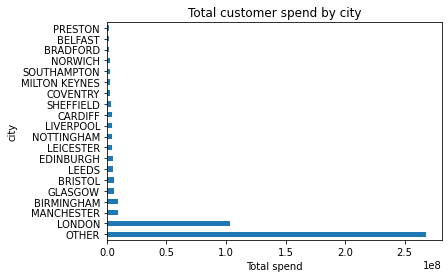

In [83]:
# Plot a horizontal bar chart for the top 20 cities based on total spending
Top_20_Cities.plot.barh()
plt.title("Total customer spend by city")
plt.xlabel("Total spend")
plt.show()

In [87]:
# get the bottom 20 cities with the lowest total spending
Last_20_Cities = dataframe.groupby("city")["total_spend"].sum().sort_values(ascending=True).head(20)

In [88]:
print(Last_20_Cities)

city
ST DAVIDS                6300
BRIGHTON & HOVE          7400
NEWCASTLE-UPON-TYNE     10900
ST ASAPH                34900
WESTMINSTER             50000
RIPON                  120100
WELLS                  255700
ARMAGH                 263400
BANGOR                 292000
LISBURN                292000
STOKE ON TRENT         302600
DUNFERMLINE            317100
LANCASTER              324700
STIRLING               325600
INVERNESS              342200
PERTH                  349500
ELY                    354000
LONDONDERRY            383700
LICHFIELD              419000
TRURO                  419300
Name: total_spend, dtype: int64


## Insights:

    * "ST DAVIDS" appears to be the city with the least total spending (6,300), and "TRURO" has the highest total spending in this subset (419,300).
    
    * The cities listed in the output are a mix of smaller cities and towns, with some well-known cities like "NEWCASTLE-UPON-TYNE" and "BRIGHTON & HOVE" having relatively low total spending.
    
    * Now, we can identify cities with lower consumer spending in comparison to other locations

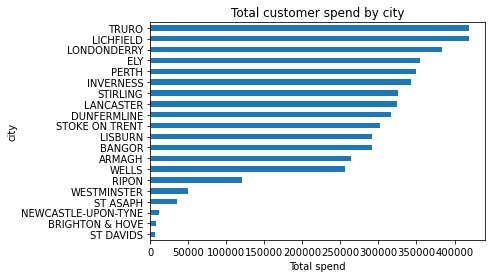

In [90]:
# Plot a horizontal bar chart for the bottom 20 cities based on total spending
Last_20_Cities.plot.barh()
plt.title("Total customer spend by city")
plt.xlabel("Total spend")
plt.show()

In [100]:
# Print the total spending of customers inside London
print("Total spend customers inside London:")
London_Total_Spending = dataframe.loc[dataframe["city"] == "LONDON", "total_spend"].sum()
print(London_Total_Spending)

Total spend customers inside London:
103042800


## London has a significantly high total spend of over 103 million units.

In [101]:
# Print the total spending of customers outside London
print("Total spend for All customers Outside London:")
Non_London_Total_Spending = dataframe.loc[dataframe["city"] != "LONDON", "total_spend"].sum()
print(Non_London_Total_Spending)

Total spend for All customers Outside London:
387331300


## All Other cities having total spend of over 387 million units.

In [102]:
# Print the total spending of customers outside London excluding OTHER in city column.
print("Total spend for All customers not found in London and OTHER:")
Non_London_Total_Spending_OTHER =dataframe.loc[(dataframe["city"].isin(["LONDON", "OTHER"])) == False, "total_spend"].sum()
print(Non_London_Total_Spending_OTHER)

Total spend for All customers not found in London and OTHER:
119524800


## All Other cities(excluding OTHER) having total spend of over 119 million units.

In [138]:
Total_Spending = dataframe["total_spend"].sum()
print("The total spend for All customers in all cities is:")
print(Total_Spending)
print("The percent of Total spend for All customers found in London: ")
London_Percent = (London_Total_Spending/Total_Spending)*100
print(London_Percent)
print("The percent of Total spend for All customers not found in London: ")
Non_London_Percent = (Non_London_Total_Spending/Total_Spending)*100
print(Non_London_Percent)
print("The percent of Total spend for All customers not found in London and OTHER: ")
Non_London_excluding_Other_Percent = (Non_London_Total_Spending_OTHER/Total_Spending)*100
print(Non_London_excluding_Other_Percent)

The total spend for All customers in all cities is:
490374100
The percent of Total spend for All customers found in London: 
21.013099998552125
The percent of Total spend for All customers not found in London: 
78.98690000144788
The percent of Total spend for All customers not found in London and OTHER: 
24.37420736535637
The percent of Underserved city to Total spend for All customers: 
0.0012847334310682396
The percent of most served city to Total spend for All customers: 
21.013099998552125


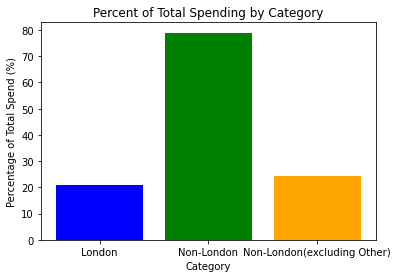

In [121]:
# Data for plotting
categories = ['London', 'Non-London', 'Non-London(excluding Other)']
percentages = [London_Percent, Non_London_Percent, Non_London_Other_Percent]

plt.bar(categories, percentages, color=['blue', 'green', 'orange'])
plt.title("Percent of Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Percentage of Total Spend (%)")

plt.show()

In [132]:
LONDON_PERCENTAGE_INCLUDE_OTHER = (London_Percent/Non_London_Percent)*100
print("the percent of london to all other non-London Cities 'including OTHER': ", LONDON_PERCENTAGE_INCLUDE_OTHER)
LONDON_PERCENTAGE_EXCLUDE_OTHER = (London_Percent/Non_London_excluding_Other_Percent)*100
print("the percent of london to all other non-London Cities 'excluding OTHER': ", LONDON_PERCENTAGE_EXCLUDE_OTHER)

the percent of london to all other non-London Cities 'including OTHER':  26.603272185852262
the percent of london to all other non-London Cities 'excluding OTHER':  86.21039315690132


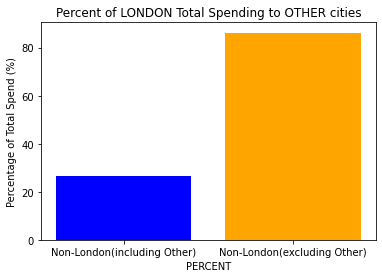

In [133]:
# Data for plotting
categories = ['Non-London(including Other)', 'Non-London(excluding Other)']
percentages = [LONDON_PERCENTAGE_INCLUDE_OTHER, LONDON_PERCENTAGE_EXCLUDE_OTHER]

plt.bar(categories, percentages, color=['blue', 'orange'])
plt.title("Percent of LONDON Total Spending to OTHER cities")
plt.xlabel("PERCENT")
plt.ylabel("Percentage of Total Spend (%)")

plt.show()

## Insights:

    1- London vs. All Other Non-London Cities (Including "OTHER"):

        * The value of 26.6% suggests that when considering all non-London cities, including those categorized as "OTHER," London's total spending is around 26.6% of the total non-London spending.
    
        * This indicates that London's share of spending is significant, but there is still a large portion of spending happening in other cities and regions (including those that are grouped as "OTHER").
    
        * The "OTHER" category likely includes smaller cities or locations with substantial spending that, when combined with other cities, contributes to a larger total, somewhat diluting London’s dominance.

    2- London vs. Non-London Cities (Excluding "OTHER"):

        * The value of 86.2% indicates that when we exclude the "OTHER" category, London’s share of the total spending is much higher in comparison to the remaining non-London cities.
    
        * This means that when you consider only the larger, more recognizable cities (excluding smaller regions categorized as "OTHER"), London accounts for a much larger portion of total spending (about 86.2% of the combined non-London spending).
        
## This highlights the dominance of London in terms of spending when "OTHER" is excluded, suggesting that the bigger, more established cities (e.g., Manchester, Birmingham) have relatively less total spending compared to London.

In [140]:
print("The percent of Underserved city to Total spend for All customers: ")
Underserved_city_percent = (Last_20_Cities[0]/Total_Spending)*100
print(Underserved_city_percent)
print("\n\n\n\n")
print("The percent of most served city to Total spend for All customers: ")
mostserved_city_percent = (Top_20_Cities[1]/Total_Spending)*100
print(mostserved_city_percent)

The percent of Underserved city to Total spend for All customers: 
0.0012847334310682396





The percent of most served city to Total spend for All customers: 
21.013099998552125


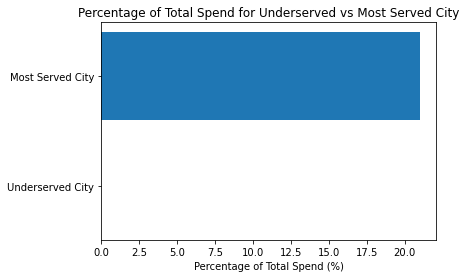

In [154]:
cities = ['Underserved City', 'Most Served City']
percentages = [Underserved_city_percent, mostserved_city_percent]

plt.barh(cities, percentages)
plt.xlabel('Percentage of Total Spend (%)')
plt.title('Percentage of Total Spend for Underserved vs Most Served City')
plt.show()

# Conclusion

## 1- Which UK cities are currently underserved?

   ### Underserved cities: 
        
   ##### The cities listed above are relatively small in terms of total spending, with St Davids having the lowest spend and Truro and Lichfield at the higher end of this group.


## 2- Are their customers primarily London-based?

   ### Customers primarily from London: 
    
   ##### These underserved cities contribute very little to the total spend compared to London. It indicates that the customers from these cities are not primarily from London.